In [66]:
import numpy as np
import pandas as pd
import requests

from sklearn.impute import SimpleImputer
from bs4 import BeautifulSoup

---

In [67]:
df = pd.read_csv('athlete_events.csv')
df.columns = [i.lower() for i in df.columns]

print(df.shape)
df.sample(5)

(271116, 15)


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
122517,61933,Armin Kogler,M,20.0,178.0,73.0,Austria,AUT,1980 Winter,1980,Winter,Lake Placid,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
237813,119254,Irina Terentjeva,F,21.0,168.0,56.0,Lithuania,LTU,2006 Winter,2006,Winter,Torino,Cross Country Skiing,Cross Country Skiing Women's 15 km Skiathlon,NaN
191464,96139,Dimitrie Popescu,M,30.0,197.0,93.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Bronze
208959,104898,Philippe-Marie Salvan,M,23.0,195.0,84.0,France,FRA,1988 Summer,1988,Summer,Seoul,Volleyball,Volleyball Men's Volleyball,NaN
3751,2155,Ali Mohammed Al-Shanqiti,M,NaN,NaN,NaN,Saudi Arabia,KSA,1984 Summer,1984,Summer,Los Angeles,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN


In [68]:
# satu atlet bisa mengikuti olympic dengan tahun yang berbeda, dimana masing2 tahun bisa mengikuti event lomba yang berbeda

df[9:20]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


---

# imputation

In [69]:
df.isnull().sum()/df.shape[0]*100

id         0.000000
name       0.000000
sex        0.000000
age        3.494445
height    22.193821
weight    23.191180
team       0.000000
noc        0.000000
games      0.000000
year       0.000000
season     0.000000
city       0.000000
sport      0.000000
event      0.000000
medal     85.326207
dtype: float64

25.556898357297374
24.0


<AxesSubplot:>

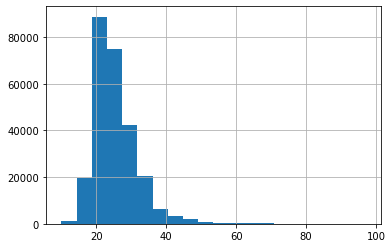

In [70]:
print(df.age.mean())
print(df.age.median())
df.age.hist(bins=20)

175.33896987366376
175.0


<AxesSubplot:>

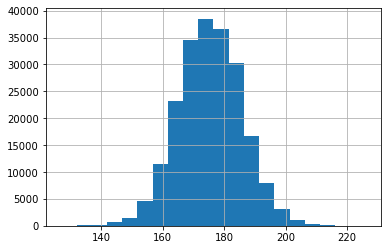

In [71]:
print(df.height.mean())
print(df.height.median())
df.height.hist(bins=20)

70.70239290053351
70.0


<AxesSubplot:>

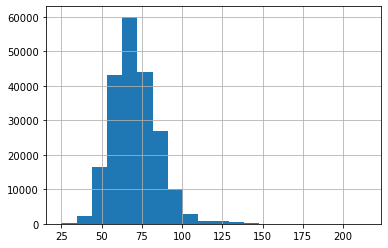

In [72]:
print(df.weight.mean())
print(df.weight.median())
df.weight.hist(bins=20)

In [73]:
df['age'].fillna(df['age'].mean(), inplace = True)
df['height'].fillna(df['height'].mean(), inplace = True)
df['weight'].fillna(df['weight'].mean(), inplace = True)
df.isnull().sum()

id             0
name           0
sex            0
age            0
height         0
weight         0
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

---

In [75]:
noc_to_country = pd.read_csv('list NOC.csv', sep=';')
noc_to_country.columns = ['country_code', 'country', 'continent']
noc_to_country

,country_code,country,continent
0,AFG,Afghanistan,Asia
1,ALB,Albania,Europe
2,ALG,Algeria,Africa
3,AND,Andorra,Europe
4,ANG,Angola,Africa
...,...,...,...
243,MIX,Mixed-NOCs,NaN
244,OAR,Olympic Athletes from Russia,NaN
245,ROT,Refugee Olympic Team,NaN
246,ZZX,Mixed team,NaN


In [76]:
print(df.shape)
df_country = df.merge(noc_to_country, left_on='noc', right_on='country_code', how='left')
print(df.shape)

(271116, 15)
(271116, 15)


In [79]:
df_country[df_country.country.isnull()][['team', 'noc', 'country']].groupby(['team']).first()

,noc,country
team,,
Circus,WIF,NaN
Crete,CRT,NaN
Newfoundland,NFL,NaN
Unknown,UNK,NaN
West Indies Federation,WIF,NaN


In [84]:
df_country.sample(5)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,country_code,country,continent
137213,68982,Andreja Leskovek (-McQuarrie),F,19.0,168.00000,60.000000,Yugoslavia,YUG,1984 Winter,1984,Winter,Sarajevo,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN,YUG,Yugoslavia,NaN
127023,64039,Marianne Kriel,F,24.0,175.33897,70.702393,South Africa,RSA,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN,RSA,South Africa,Africa
128462,64680,"Jean ""Jey"" Kugeler",M,42.0,175.33897,70.702393,Luxembourg,LUX,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,NaN,LUX,Luxembourg,Europe
29025,15014,Harold Suydam Brewster,M,29.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Bronze,USA,United States,Americas
186719,93860,Carl Wilhelm Malkus Petersn,M,39.0,152.00000,70.702393,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver,SWE,Sweden,Europe


In [83]:
df_country.isnull().sum()/df_country.shape[0]*100

id               0.000000
name             0.000000
sex              0.000000
age              0.000000
height           0.000000
weight           0.000000
team             0.000000
noc              0.000000
games            0.000000
year             0.000000
season           0.000000
city             0.000000
sport            0.000000
event            0.000000
medal           85.326207
country_code     0.012541
country          0.012541
continent        7.591953
dtype: float64

In [89]:
df_country[df_country.continent.isnull()].year.max()

2016

In [93]:
df_country[df_country.continent.isnull() & (df_country.year==2016)]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,country_code,country,continent
3165,1773,Ahmad Al-Afasi,M,33.0,175.33897,70.702393,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,NaN,IOA,Independent Olympic Athletes,NaN
3306,1858,Fehaid Al-Deehani,M,49.0,178.00000,95.000000,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,IOA,Independent Olympic Athletes,NaN
3369,1897,Abdulrahman Al-Faihan,M,30.0,175.33897,70.702393,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Trap,NaN,IOA,Independent Olympic Athletes,NaN
3586,2053,Khaled Al-Mudhaf,M,38.0,164.00000,105.000000,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Trap,NaN,IOA,Independent Olympic Athletes,NaN
3680,2112,Abdullah Al-Rashidi,M,52.0,183.00000,83.000000,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,IOA,Independent Olympic Athletes,NaN
3758,2161,Abdulaziz Al-Shatti,M,25.0,175.33897,70.702393,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's epee, Individual",NaN,IOA,Independent Olympic Athletes,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.00000,61.000000,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,ROT,Refugee Olympic Team,NaN
7908,4379,Rami Anis,M,25.0,178.00000,78.000000,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,ROT,Refugee Olympic Team,NaN
7909,4379,Rami Anis,M,25.0,178.00000,78.000000,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,ROT,Refugee Olympic Team,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.00000,62.000000,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,ROT,Refugee Olympic Team,NaN


---

In [95]:
# df_country.to_csv('df_country.csv')